# Are earthquakes getting shallower?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, linregress

# ----------------------------------------
# 1. Load Data
# ----------------------------------------
df = pd.read_csv("data/query.csv")

# Ensure datetime
df["time"] = pd.to_datetime(df["time"])

In [2]:
# ----------------------------------------
# 2. REGION FILTER
#    Bangladesh + Nearby Areas
# ----------------------------------------
# Bangladesh approx bounds:
# lat: 20.5°N – 27.0°N
# lon: 88.0°E – 93.0°E
# Add small margins around
# lat_min, lat_max = 19.0, 28.0
# lon_min, lon_max = 86.0, 95.0
min_lat, max_lat = 20.0, 26.9
min_lon, max_lon = 87.5, 93.0

df_region = df[
    (df["latitude"].between(min_lat, max_lat)) &
    (df["longitude"].between(min_lon, max_lon))
].copy()

print("Events in region:", len(df_region))

Events in region: 465


In [3]:
# ----------------------------------------
# 3. Compute Year
# ----------------------------------------
df_region["year"] = df_region["time"].dt.year

# ----------------------------------------
# 4. MEDIAN DEPTH BY YEAR
# ----------------------------------------
depth_by_year = df_region.groupby("year")["depth"].median()

# ----------------------------------------
# 5. FRACTION OF SHALLOW QUAKES (<40 km)
# ----------------------------------------
df_region["is_shallow"] = df_region["depth"] < 40
shallow_fraction = df_region.groupby("year")["is_shallow"].mean()

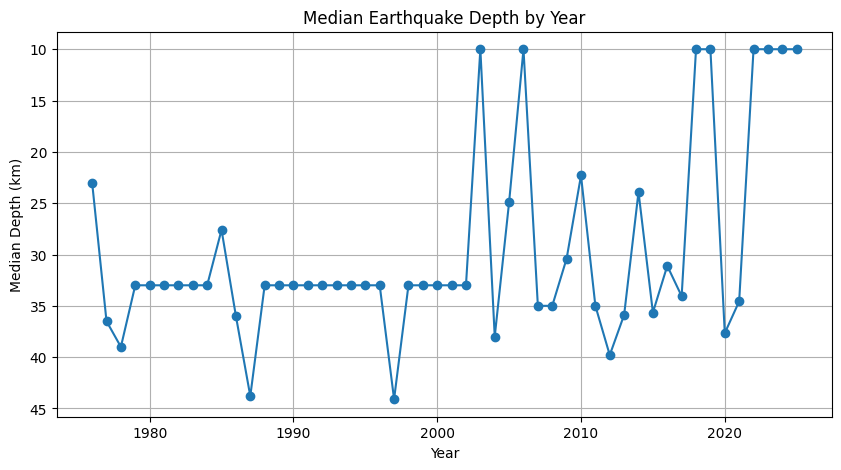

In [4]:
# ----------------------------------------
# 6. PLOTS
# ----------------------------------------

plt.figure(figsize=(10,5))
plt.plot(depth_by_year.index, depth_by_year.values, marker='o')
plt.gca().invert_yaxis()  # shallow = up
plt.title("Median Earthquake Depth by Year")
plt.xlabel("Year")
plt.ylabel("Median Depth (km)")
plt.grid(True)
plt.show()

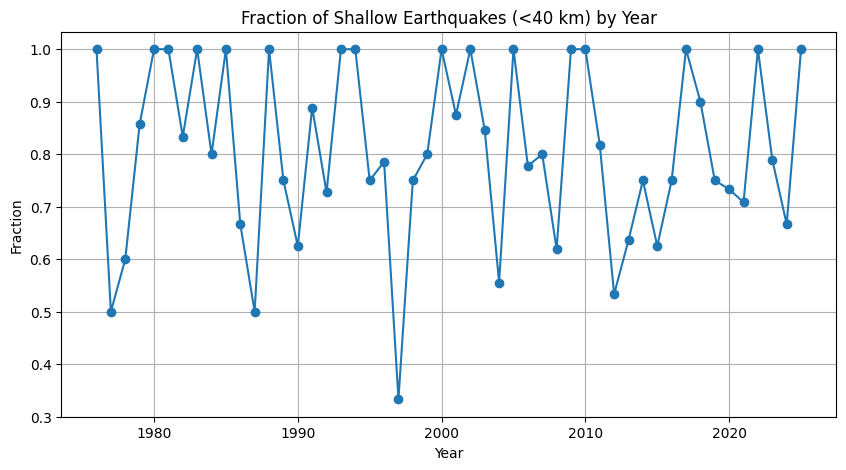

In [5]:
plt.figure(figsize=(10,5))
plt.plot(shallow_fraction.index, shallow_fraction.values, marker='o')
plt.title("Fraction of Shallow Earthquakes (<40 km) by Year")
plt.xlabel("Year")
plt.ylabel("Fraction")
plt.grid(True)
plt.show()


In [6]:
# ----------------------------------------
# 7. TREND TESTS
# ----------------------------------------

# Mann–Kendall (via kendalltau, not full MK but similar monotonic trend test)
years = depth_by_year.index.values
median_depth_values = depth_by_year.values

tau, p_mk = kendalltau(years, median_depth_values)

print("----- Mann–Kendall Trend Test -----")
print("tau =", tau)
print("p-value =", p_mk)
if p_mk < 0.05:
    print("Significant trend detected (p < 0.05)")
else:
    print("No statistically significant trend")

----- Mann–Kendall Trend Test -----
tau = -0.19116173350962037
p-value = 0.06574401611983494
No statistically significant trend


In [7]:
# ----------------------------------------
# 8. Linear Regression Trend
# ----------------------------------------
reg = linregress(years, median_depth_values)

print("\n----- Linear Regression Trend -----")
print("Slope (km/year) =", reg.slope)
print("Intercept =", reg.intercept)
print("p-value =", reg.pvalue)
print("R² =", reg.rvalue**2)

if reg.pvalue < 0.05:
    if reg.slope < 0:
        print("Depth decreasing over time → earthquakes getting shallower")
    else:
        print("Depth increasing over time → earthquakes getting deeper")
else:
    print("No statistically meaningful trend in depth over time")


----- Linear Regression Trend -----
Slope (km/year) = -0.30706818727491
Intercept = 643.9546086434574
p-value = 0.0006259276159024281
R² = 0.21822711109553194
Depth decreasing over time → earthquakes getting shallower


In [8]:
# ----------------------------------------
# 9. CONCLUSION SECTION
# ----------------------------------------
print("\nINTERPRETATION GUIDE:")
print("- If median depth decreases and slope < 0 → getting shallower.")
print("- If shallow fraction is rising → more shallow events.")
print("- If Mann-Kendall p < 0.05 → trend is statistically significant.")


INTERPRETATION GUIDE:
- If median depth decreases and slope < 0 → getting shallower.
- If shallow fraction is rising → more shallow events.
- If Mann-Kendall p < 0.05 → trend is statistically significant.


<Axes: xlabel='year'>

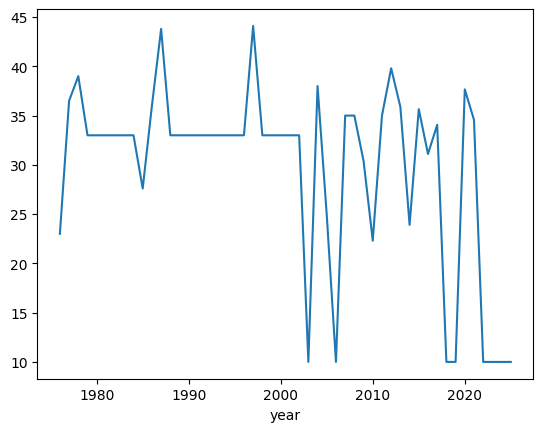

In [9]:
df_region.groupby("year")["depth"].median().plot()


<Axes: xlabel='year'>

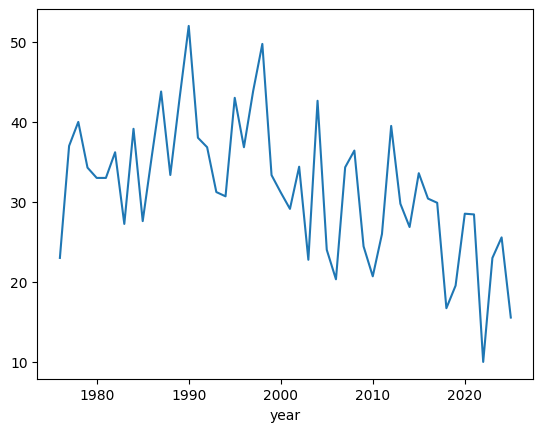

In [10]:
df_region.groupby("year")["depth"].mean().plot()


In [11]:
df_region[df_region["year"] < 2005]["depth"].describe()
df_region[df_region["year"] >= 2005]["depth"].describe()


count    262.000000
mean      27.362492
std       15.449457
min        7.870000
25%       10.000000
50%       30.895000
75%       38.752500
max       62.000000
Name: depth, dtype: float64